<a href="https://colab.research.google.com/github/arkobera/Research-SIH/blob/main/Outage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OUTAGE STATS(2020-2022)
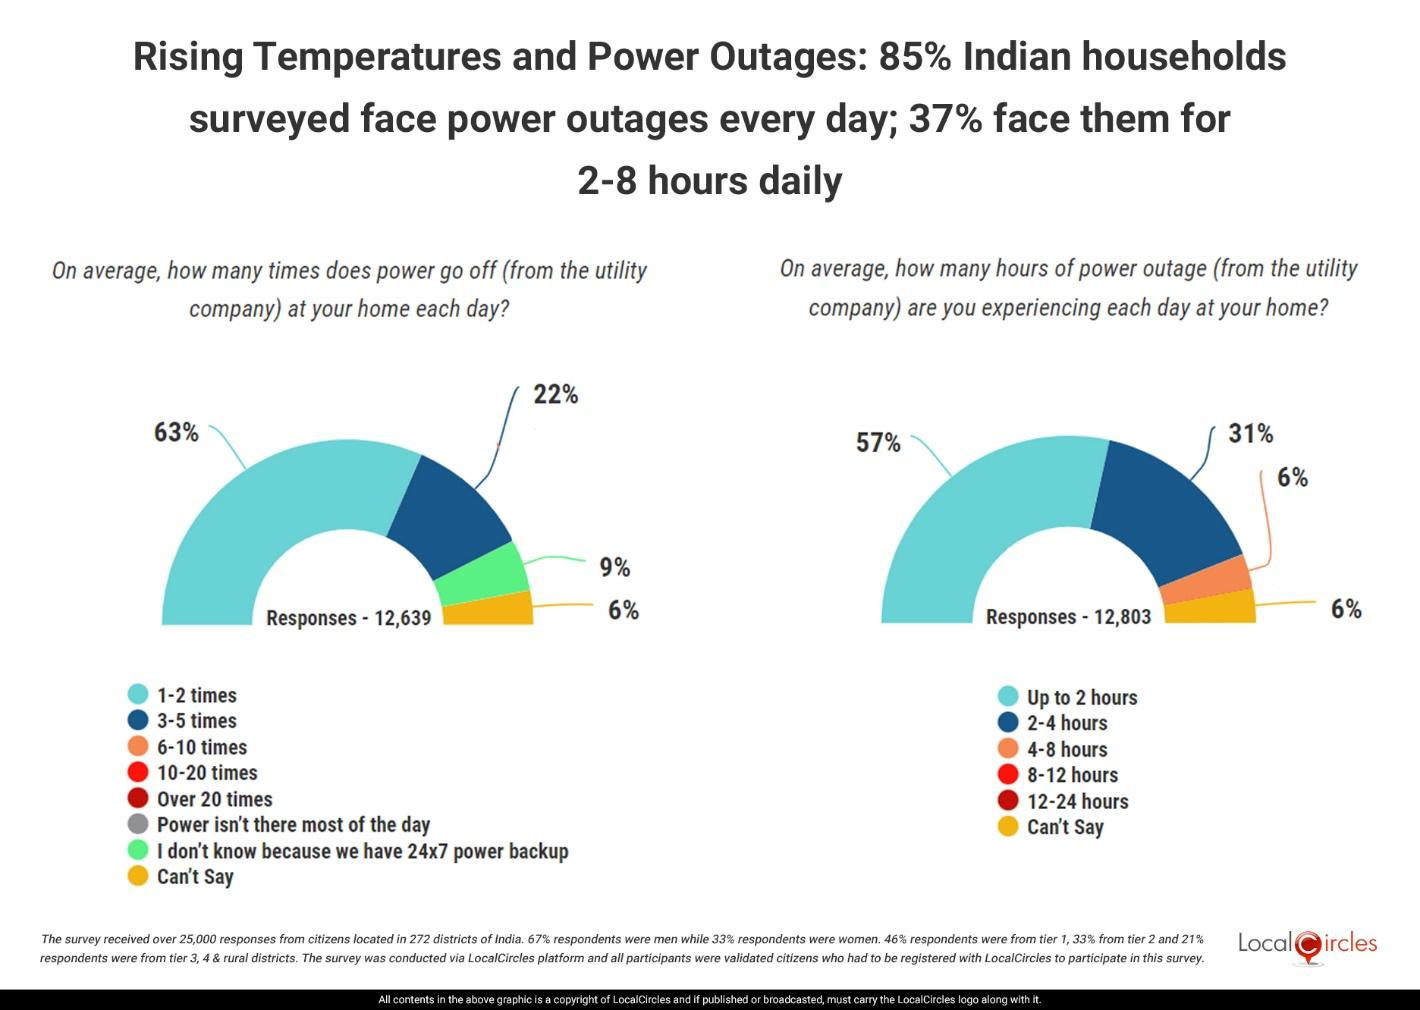

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd

e_df = pd.read_json("/content/rene_energy.json")
e_df.head()

,ID,Month,State,fy,region,wind,solar,biomass,bagasse,small_hydel,others,total
0,1792,Jan-1900,,1899-1900,Gas Consumed/Supplied,0.2273,13.06432211639992,0.9445349999999999,0.8498999999999999,14.85875711639992,,
1,1837,Jan-1900,Chandigarh,1899-1900,NR,0,1.43,0,0,0,0,1.43
2,1838,Jan-1900,Delhi,1899-1900,NR,0,17.211,0,0,0,36.279682,53.490682
3,1839,Jan-1900,Haryana,1899-1900,NR,0,49.3,24.96,32.69,8.93,4.75,120.63
4,1840,Jan-1900,HP,1899-1900,NR,0,4.62,0,0,116.87,0,121.49


In [ ]:
e_df['Month'] = pd.to_datetime(e_df['Month'], format='%b-%Y')
e_df.head()

,ID,Month,State,fy,region,wind,solar,biomass,bagasse,small_hydel,others,total
0,1792,1900-01-01,,1899-1900,Gas Consumed/Supplied,0.2273,13.06432211639992,0.9445349999999999,0.8498999999999999,14.85875711639992,,
1,1837,1900-01-01,Chandigarh,1899-1900,NR,0,1.43,0,0,0,0,1.43
2,1838,1900-01-01,Delhi,1899-1900,NR,0,17.211,0,0,0,36.279682,53.490682
3,1839,1900-01-01,Haryana,1899-1900,NR,0,49.3,24.96,32.69,8.93,4.75,120.63
4,1840,1900-01-01,HP,1899-1900,NR,0,4.62,0,0,116.87,0,121.49


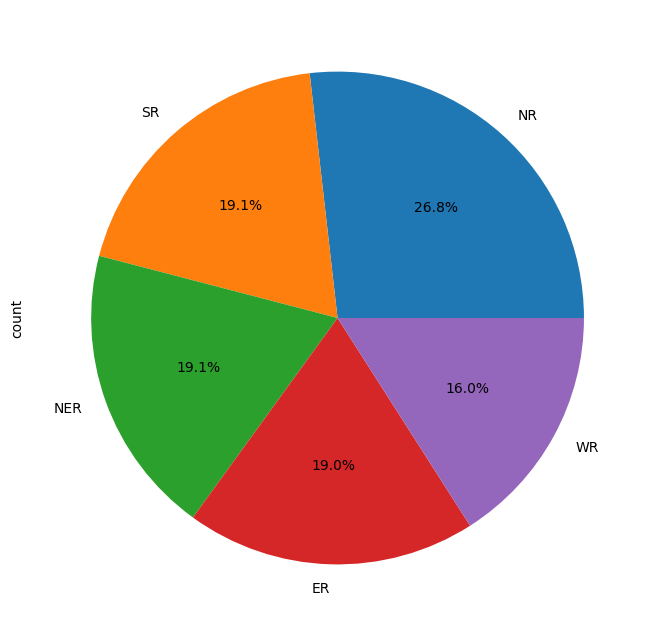

In [ ]:
# Get the value counts for the 'region' column
region_counts = e_df['region'].value_counts()

# Filter regions that appear more than 50 times
filtered_regions = region_counts[region_counts > 50].index

# Filter the original dataframe to include only these regions
filtered_df = e_df[e_df['region'].isin(filtered_regions)]

# Plot pie chart
filtered_df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.show()


In [ ]:
print(e_df.shape,e_df.info())
e_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           2087 non-null   int64         
 1   Month        2087 non-null   datetime64[ns]
 2   State        2087 non-null   object        
 3   fy           2087 non-null   object        
 4   region       2087 non-null   object        
 5   wind         2087 non-null   object        
 6   solar        2087 non-null   object        
 7   biomass      2087 non-null   object        
 8   bagasse      2087 non-null   object        
 9   small_hydel  2087 non-null   object        
 10  others       2087 non-null   object        
 11  total        2087 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 195.8+ KB
(2087, 12) None


,0
ID,0
Month,0
State,0
fy,0
region,0
wind,0
solar,0
biomass,0
bagasse,0
small_hydel,0


In [ ]:
delhi_df = e_df[e_df['State'] == 'Delhi']
print(delhi_df.shape)
delhi_df.head()

(49, 12)


,ID,Month,State,fy,region,wind,solar,biomass,bagasse,small_hydel,others,total
2,1838,1900-01-01,Delhi,1899-1900,NR,0,17.211,0,0,0,36.279682,53.490682
263,2,2019-04-01,Delhi,2019-2020,NR,0,13.34,0,0,0,26.98,40.32
300,39,2019-05-01,Delhi,2019-2020,NR,0,16.22,0,0,0,24.81,41.03
337,76,2019-06-01,Delhi,2019-2020,NR,0,14.42,0,0,0,25.18,39.6
374,113,2019-07-01,Delhi,2019-2020,NR,0,11.63,0,0,0,25.12,36.75


In [ ]:
fig1 = px.line(delhi_df,x='Month',y=['wind','solar','biomass','bagasse','small_hydel','others','total'])
fig1.update_xaxes(rangeslider_visible=True)
fig1.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
power_gen = pd.read_json('/content/power_Generation.json')
power_gen.head()

,ID,Month,fy,mode,Region_State,bus
0,1,Feb-2019,2018-2019,THERMAL,All India,89.30048
1,2,Feb-2019,2018-2019,NUCLEAR,All India,3.17291
2,3,Feb-2019,2018-2019,HYDRO,All India,8.43584
3,4,Feb-2019,2018-2019,BHUTAN IMP_Hydro,All India,0.06820
4,5,Feb-2019,2018-2019,RENEWABLE,All India,11.24518


In [ ]:
power_gen['Month'] = pd.to_datetime(power_gen['Month'], format='%b-%Y')
print(power_gen.info(),power_gen.shape)
power_gen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            259 non-null    int64         
 1   Month         259 non-null    datetime64[ns]
 2   fy            259 non-null    object        
 3   mode          259 non-null    object        
 4   Region_State  259 non-null    object        
 5   bus           259 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 12.3+ KB
None (259, 6)


,ID,Month,fy,mode,Region_State,bus
0,1,2019-02-01,2018-2019,THERMAL,All India,89.30048
1,2,2019-02-01,2018-2019,NUCLEAR,All India,3.17291
2,3,2019-02-01,2018-2019,HYDRO,All India,8.43584
3,4,2019-02-01,2018-2019,BHUTAN IMP_Hydro,All India,0.06820
4,5,2019-02-01,2018-2019,RENEWABLE,All India,11.24518


Exploring the non-renewable scources

In [ ]:
Thermal_df = power_gen[power_gen['mode']=='THERMAL']
print(Thermal_df.shape)
Thermal_df.head()

(64, 6)


,ID,Month,fy,mode,Region_State,bus
0,1,2019-02-01,2018-2019,THERMAL,All India,89.30048
9,6,2019-03-01,2018-2019,THERMAL,All India,82.81242
10,11,2019-04-01,2019-2020,THERMAL,All India,66.80572
18,16,2019-07-01,2019-2020,THERMAL,All India,87.37192
19,20,2019-08-01,2019-2020,THERMAL,All India,80.78213


In [ ]:
fig2 = px.line(Thermal_df,x='Month',y='bus')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import plotly.graph_objects as go

# Create figure
combined_fig = go.Figure()

# Add traces from the first plot (delhi_df with renewable sources)
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['wind'], mode='lines', name='Wind'))
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['solar'], mode='lines', name='Solar'))
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['biomass'], mode='lines', name='Biomass'))
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['bagasse'], mode='lines', name='Bagasse'))
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['small_hydel'], mode='lines', name='Small Hydel'))
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['others'], mode='lines', name='Others'))
combined_fig.add_trace(go.Scatter(x=delhi_df['Month'], y=delhi_df['total'], mode='lines', name='Total Renewable'))

# Add traces from the second plot (Thermal_df)
combined_fig.add_trace(go.Scatter(x=Thermal_df['Month'], y=Thermal_df['bus'], mode='lines', name='Thermal Energy'))

# Add a range slider
combined_fig.update_xaxes(rangeslider_visible=True)

# Set title and labels
combined_fig.update_layout(
    title="Renewable and Thermal Energy Comparison",
    xaxis_title="Month",
    yaxis_title="Energy (MW)"
)

# Show the combined figure
combined_fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Summary of Exploratory Data Analysis (EDA) on Energy Data
1. Electricity Consumption:
Trend: Electricity consumption has been steadily increasing over time, indicating growing demand across sectors.
Insight: This reflects natural load growth due to factors like industrialization, urbanization, and population increase.
2. Power Outages:
Pattern: Power outages exhibit a seasonal pattern, typically increasing from January to December, with a peak at the end of the year.
Peak in December 2021: This peak was slightly higher than the peak in December 2020, suggesting that outages may be intensifying.
Insight: The steep decline to zero at the beginning of the year and gradual build-up could indicate maintenance cycles or seasonal factors affecting the grid's reliability.
3. Energy Production (Renewable and Non-Renewable):
Trend: Both renewable and non-renewable energy production have increased.
Dominance of Thermal Power: Thermal (non-renewable) power plants provide the majority of energy.
Insight: The increasing trend in both sources suggests efforts to meet growing energy demand, but reliance on thermal energy remains dominant.
4. Coal Extraction:
Trend: Coal extraction has generally increased, but there was a significant drop post-COVID compared to pre-pandemic years.
Insight: The dip may have been caused by supply chain disruptions or policy changes, though recovery is likely.
5. Electricity Sales:
Trend: Sales of electricity have increased, with the industrial sector being the primary consumer.
Insight: Growing industrialization is driving energy demand, but it also implies that improving energy efficiency in this sector could lead to significant reductions in overall consumption.
6. Transformation Capacity:
Fluctuations: The transformation capacity, especially around substations, shows a fluctuating pattern. It tends to be higher in May each year from 2014 to 2024.
Insight: May's higher capacity could align with seasonal peaks in energy demand, suggesting the system is calibrated to handle such spikes. However, fluctuations could indicate uneven infrastructure distribution or maintenance.
7. Delhi Power Demand and Supply:
Observation: In most cases, the Delhi government has successfully met the required energy demands, with energy availability closely matching energy requirements.
Insight: This indicates that, at least in Delhi, energy planning and management have been effective, with minimal shortfalls.
8. Renewable Energy:
Trend: Renewable energy sources like wind, solar, biomass, and small hydel have shown an increasing trend over time.
2023 Dip: There was a temporary drop in renewable energy production at the start of 2023, but it soon caught up with the trend.
Insight: Renewable energy is becoming a more significant part of the energy mix, though variability (due to weather or infrastructure issues) remains a challenge.
9. Non-Renewable Energy During Renewable Dips:
Observation: Non-renewable energy sources filled the gap during renewable energy dips, particularly during the 2023 dip.
Insight: This shows the grid’s flexibility and reliance on non-renewable sources during disruptions in renewable energy production.
Inferences:
Energy Demand Growth: India’s energy demand is increasing due to factors like industrialization and population growth, putting pressure on both renewable and non-renewable energy sources.

Grid Reliability: The grid shows flexibility, with non-renewable energy sources compensating for renewable energy dips, but this comes at the cost of higher carbon emissions and reliance on fossil fuels.

Seasonal Fluctuations: Power outages show a distinct seasonal pattern, and infrastructure such as transformation capacity seems designed to handle peak demand periods. However, fluctuations indicate room for improvement in balancing capacity and demand.

Renewable Energy’s Role: While renewable energy production is on the rise, it remains variable and insufficient to completely displace non-renewable sources during dips. More robust storage or backup systems could enhance its reliability.

Recommendations:
Expand Renewable Energy Capacity: Continue increasing the capacity of renewable energy sources, particularly solar and wind, to reduce dependency on thermal power plants.

Energy Storage Solutions: Invest in energy storage technologies (such as batteries) to store excess renewable energy during peak production periods and release it during dips. This can smooth out the variability in renewable sources and reduce the need for non-renewables.

Demand-Side Management: Implement demand-side management strategies, particularly for industrial consumers, to reduce peak load pressures on the grid. Incentivizing energy-efficient technologies in the industrial sector could substantially reduce demand.

Infrastructure Expansion and Optimization: Address fluctuations in transformation capacity by optimizing grid infrastructure, ensuring that substations and transmission lines are well-maintained and capable of handling future growth in demand.

Address Power Outages: Investigate the cause of the yearly power outage cycle and implement maintenance or upgrade schedules to minimize outages, especially during peak demand months (e.g., December).

Carbon Footprint Reduction: Given the reliance on non-renewables during renewable energy dips, there is a need to develop strategies to reduce the carbon footprint, such as increasing carbon capture technologies at thermal power plants.

By following these recommendations, India's energy grid can become more resilient, sustainable, and capable of meeting the growing demand while reducing the reliance on fossil fuels and minimizing environmental impact.

Price of Coal

In [ ]:
import pandas as pd

coal_df = pd.read_csv('/content/COAL Historical Data (1).csv')
coal_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-09-2024,497.00,523.90,529.00,495.30,39.51M,-5.32%
1,01-08-2024,524.95,535.00,543.55,497.55,245.92M,0.53%
2,01-07-2024,522.20,473.35,525.60,464.55,233.61M,10.37%
3,01-06-2024,473.15,515.00,527.40,410.80,255.46M,-3.67%
4,01-05-2024,491.20,456.00,507.35,435.00,228.05M,8.12%


In [ ]:
print(coal_df.shape)
coal_df.info()

(166, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      166 non-null    object 
 1   Price     166 non-null    float64
 2   Open      166 non-null    float64
 3   High      166 non-null    float64
 4   Low       166 non-null    float64
 5   Vol.      166 non-null    object 
 6   Change %  166 non-null    object 
dtypes: float64(4), object(3)
memory usage: 9.2+ KB


In [ ]:
coal_df['Date'] = pd.to_datetime(coal_df['Date'])
coal_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-01-09,497.00,523.90,529.00,495.30,39.51M,-5.32%
1,2024-01-08,524.95,535.00,543.55,497.55,245.92M,0.53%
2,2024-01-07,522.20,473.35,525.60,464.55,233.61M,10.37%
3,2024-01-06,473.15,515.00,527.40,410.80,255.46M,-3.67%
4,2024-01-05,491.20,456.00,507.35,435.00,228.05M,8.12%


In [ ]:
import plotly.express as px

fig3 = px.line(coal_df,x='Date',y='Price')
fig3.update_xaxes(rangeslider_visible=True)
fig3.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Reason

---

 Around 2010, coal prices were relatively high due to increased demand and limited supply globally. This was driven by growth in industrial activities and energy demand, especially in countries like India and China. However, in the years following 2010, coal prices dropped, largely due to a global shift toward renewable energy sources and a decrease in demand.

The price rise in 2022 can be attributed to global supply chain disruptions, increased energy demands after the COVID-19 pandemic, and geopolitical factors, including the Russia-Ukraine conflict, which affected energy supplies worldwide. This resurgence in coal demand drove the prices up again as countries sought to ensure energy security.

These trends reflect the balancing act between renewable energy adoption and reliance on coal as a stable energy source during uncertain times.

Transmission losses

In [ ]:
import pandas as pd

# Reading the CSV files
df1 = pd.read_csv("/content/trans_part1.csv")
df2 = pd.read_csv("/content/trans_part2.csv")
df3 = pd.read_csv("/content/trans_part3.csv")

# Merging the dataframes by concatenating them
merged_df = pd.concat([df1, df2, df3], ignore_index=True)
print(merged_df.shape)
# Display the first few rows of the merged dataframe
merged_df.head()


(96, 6)


,Date & Time Block,Total drawal (MWh),Total injection (MWh),Exempted RE Injection (MWh),Loss (MWh),Loss %
0,2024-08-19 00:00:00,25007.32,25654.12,263.60,646.80,2.55
1,2024-08-19 00:15:00,25116.00,25831.26,269.36,715.26,2.80
2,2024-08-19 00:30:00,25061.38,25811.23,278.64,749.85,2.94
3,2024-08-19 00:45:00,25044.36,25755.45,270.22,711.09,2.79
4,2024-08-19 01:00:00,24799.79,25538.48,263.09,738.68,2.92


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date & Time Block            96 non-null     object 
 1   Total drawal (MWh)           96 non-null     float64
 2   Total injection (MWh)        96 non-null     float64
 3   Exempted RE Injection (MWh)  96 non-null     float64
 4   Loss (MWh)                   96 non-null     float64
 5   Loss %                       96 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.6+ KB


In [ ]:
merged_df['Date & Time Block'] = pd.to_datetime(merged_df['Date & Time Block'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date & Time Block            96 non-null     datetime64[ns]
 1   Total drawal (MWh)           96 non-null     float64       
 2   Total injection (MWh)        96 non-null     float64       
 3   Exempted RE Injection (MWh)  96 non-null     float64       
 4   Loss (MWh)                   96 non-null     float64       
 5   Loss %                       96 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.6 KB


In [ ]:
fig4 = px.line(merged_df,x='Date & Time Block',y='Loss (MWh)')
fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




The analysis of transmission losses in India reveals some interesting patterns:

Peak Loss at 19:15: The highest loss of 831 MWh at 19:15 indicates a significant increase in transmission losses during this time. This peak might correspond to high electricity consumption in the evening when residential and commercial activities are at their peak. High demand can strain the transmission infrastructure, leading to increased losses.

Lowest Loss at 09:00: The lowest loss of 634 MWh at 09:00 suggests that transmission losses are lower in the morning when electricity demand is typically lower. Reduced demand can ease the load on the transmission system, resulting in lower losses.

Possible Inferences:
High Evening Demand: The peak in transmission losses at 19:15 aligns with high evening electricity consumption, suggesting that the transmission infrastructure might be operating closer to its capacity limits during peak hours. This can lead to inefficiencies and higher losses.

Infrastructure Stress: The higher losses during peak hours might indicate that the transmission infrastructure is stressed or not fully optimized for high-demand periods. This could be an area to investigate for potential improvements or upgrades.

Demand Management: Implementing demand management strategies, such as demand response programs or incentivizing off-peak usage, could help reduce the peak load and subsequently lower transmission losses.

Infrastructure Optimization: It might be worth exploring whether the transmission infrastructure can be optimized or upgraded to better handle peak loads and reduce losses. This could involve enhancing grid reliability, improving maintenance practices, or investing in technology to reduce losses.

Understanding these patterns can help in designing strategies to minimize transmission losses and improve overall grid efficiency.